In [30]:
from jwst_backgrounds import jbt
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import speclite.filters

In [6]:
# Number of equal-area chunks
n_chunks = 1000

# Healpix requires nside parameter; number of pixels = 12 * nside^2
# Find closest nside that gives ~100 pixels
nside = int(np.sqrt(n_chunks / 12))
npix = hp.nside2npix(nside)
print(f"Using nside={nside}, total pixels={npix}")

# Get pixel centers in RA/Dec
theta, phi = hp.pix2ang(nside, np.arange(npix))
# theta = colatitude (0 at north pole), phi = longitude
ra = np.degrees(phi)  # RA in degrees
dec = np.degrees(0.5*np.pi - theta)  # Dec in degrees

# Store central coordinates
coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')

# Convert to Galactic coordinates
gal = coords.galactic

Using nside=9, total pixels=972


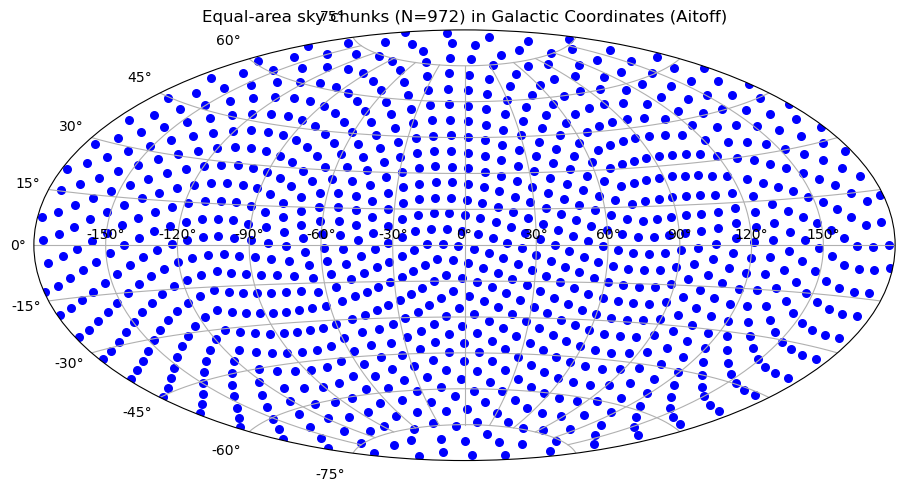

In [7]:
# Aitoff projection requires radians and longitudes in [-pi, pi]
l_deg = ((gal.l.deg + 180) % 360) - 180
l_rad = np.radians(l_deg)
b_rad = np.radians(gal.b.deg)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='aitoff')
ax.scatter(l_rad, b_rad, s=30, c='blue', marker='o')
ax.set_title(f"Equal-area sky chunks (N={npix}) in Galactic Coordinates (Aitoff)")
ax.grid(True)

# Set x-ticks in degrees for readability
xticks_deg = np.array([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150])
ax.set_xticks(np.radians(xticks_deg))
ax.set_xticklabels([f"{d}°" for d in xticks_deg])

plt.tight_layout()
plt.show()

These coordinates are observable by JWST 137 days per year.
For 68 of those days, the background is < 1.1 times the minimum, at wavelength 2.15 micron


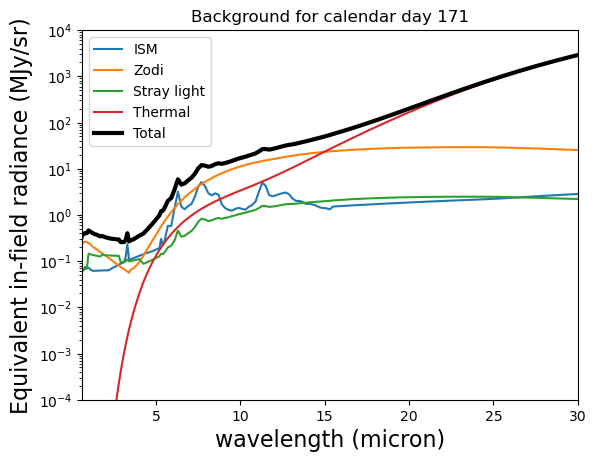

In [10]:
jbt.get_background(ra=223.555, dec=-54.395, wavelength=2.15, plot_background=True, write_background=True, background_file='bkg.txt', plot_bathtub=False, write_bathtub=False)

In [28]:
fname = 'bkg.txt'

# Try to read with structured names (handles header lines)
data = np.genfromtxt(fname, comments='#', dtype=None, encoding='utf-8')

wlen = np.asarray(data).astype(float)[:, 0] * u.micron
sb = np.asarray(data).astype(float)[:, 1] * u.MJy / u.sr

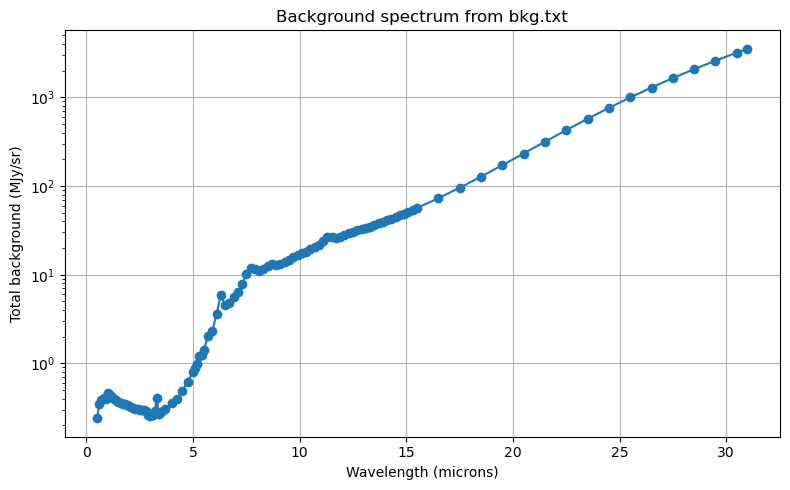

In [29]:
# Plot
plt.figure(figsize=(8,5))
plt.plot(wlen, sb, marker='o', linestyle='-')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Total background (MJy/sr)')
plt.title('Background spectrum from bkg.txt')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
filters = speclite.filters.load_filters('sdss2010-i')

/data/bwedig/.conda/envs/mejiro-v2/lib/python3.10/site-packages/speclite/resample.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkgr
